In [1]:
import numpy as np
import matplotlib.pyplot as plt

I am going to look at each application as a binomial experiment!

In [2]:
from scipy.stats import binom

This is the "success" rate per application. For reference: NHFP was 6 % a couple of years ago.

In [3]:
p  = 10/100 

In [4]:
p = 20/100

This is the number of minimum job offers.

In [5]:
k = 2 

Anything above k is good. So to compute the 'atleast k' job offers, I am going to sum the probability mass function.

In [6]:
def summed_pmf(k,n,p):
    'Binomial Probability Mass function summation'
    sum_ = 0
    for k in np.arange(k,n+1):
        sum_ += binom.pmf(k,n,p)  # summing probabilities
    return sum_

In [7]:
p_success = []

In [8]:
n=1

while True:

# for i, n in enumerate(ns):
    p_ = summed_pmf(k,n,p)
    p_success.append(p_)
    n+=1
    
    if abs(max(p_success) - 0.5)<0.015:
        print(f"probability of atleast {k} job offers hits {p_*100:.2f}% by {n} applications (assuming {p*100}% success).\n")
        
    if abs(max(p_success) - 0.8)<0.015:        
        print(f"probability of atleast {k} job offers hits {p_*100:.2f}% by {n} applications (assuming {p*100}% success rate).\n")
    
    if abs(max(p_success) - 1.0)<0.015:        
        print(f"probability of atleast {k} job offers hits {p_*100:.2f}% by {n} applications (assuming {p*100}% success rate).\n")
        break 
    


probability of atleast 2 job offers hits 49.67% by 9 applications (assuming 20.0% success).

probability of atleast 2 job offers hits 80.21% by 15 applications (assuming 20.0% success rate).

probability of atleast 2 job offers hits 98.72% by 30 applications (assuming 20.0% success rate).



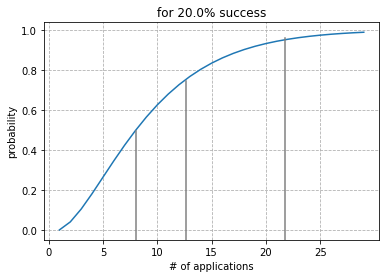

In [9]:
fig, ax = plt.subplots()
ns = np.arange(1, len(p_success)+1)

ax.plot(ns, p_success)

ax.grid(1, ls="dashed")

ax.set_ylabel("probability")

ax.set_xlabel("# of applications")

ax.set_title(f"for {p * 100}% success")

ax.axvline(x=np.interp(0.5, p_success, ns),ymin=0,ymax=0.5,color='grey')
ax.axvline(x=np.interp(0.75, p_success, ns),ymin=0,ymax=0.73,color='grey')
ax.axvline(x=np.interp(0.95, p_success, ns),ymin=0,ymax=0.93,color='grey')

_ = ax.set_xticks(np.arange(0, max(ns), 5))